In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
df = pd.read_csv('C:/Users/Admin/ПРОГИ_admin/классификация документов/data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


In [4]:
df.tail()

,Day,t
3280,2016-12-27,1
3281,2016-12-28,-3
3282,2016-12-29,0
3283,2016-12-30,3
3284,2016-12-31,4


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [5]:
# ваш код
means_by_year = df.groupby(df.Day.dt.year)['t'].mean().reset_index().rename(columns={'Day':'Year'})
print('Средняя температура каждого года:')
print(means_by_year)
print('самый холодный год: ', means_by_year['Year'].loc[means_by_year['t'].argmin()])
print('самый теплый год: ', means_by_year['Year'].loc[means_by_year['t'].argmax()])

Средняя температура каждого года:
   Year         t
0  2008  8.545205
1  2009  7.610959
2  2010  7.117808
3  2011  8.337912
4  2012  6.980822
5  2013  8.728767
6  2014  8.931507
7  2015  9.079452
8  2016  7.907104
самый холодный год:  2012
самый теплый год:  2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [6]:
# ваш код
df2 = df.copy()
df2['year'] = pd.DatetimeIndex(df['Day']).year
df2['month'] = pd.DatetimeIndex(df['Day']).month
jan_plus = df2[(df2['month']==1) & (df2['t']>=0)]
counts = jan_plus.groupby(jan_plus['year'])['Day'].count().reset_index().rename(columns={'Day':'count'})
print('количество дней в январе с положительной температурой по годам')
print(counts)
print('год с наибольшим количеством дней в январе с положительной температурой:', counts['year'].loc[counts['count'].argmax()])

количество дней в январе с положительной температурой по годам
   year  count
0  2008     19
1  2009     11
2  2011      5
3  2012      6
4  2013      5
5  2014      8
6  2015     14
7  2016      5
год с наибольшим количеством дней в январе с положительной температурой: 2008


**3.** В каком году было самое холодное лето (по средней температуре)

In [7]:
# ваш код
summer_df = df2[(df2['month']>=6) & (df2['month']<=8)]
means = summer_df.groupby(summer_df['year'])['t'].mean().reset_index()
print('средние температуры лета по годам:')
print(means)
print('самое холодное лето было в ', means['year'].loc[means['t'].argmin()], ' году')

средние температуры лета по годам:
   year          t
0  2008  18.119565
1  2009  18.728261
2  2010  22.119565
3  2011  21.318681
4  2012  19.086957
5  2013  21.543478
6  2014  20.706522
7  2015  19.032609
8  2016  19.326087
самое холодное лето было в  2008  году


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [8]:
# ваш код
df3 = df.copy()
df3['t_diff'] = df3['t'].diff().abs()
# print(df3)
print(df3['Day'].loc[df3['t_diff'].argmax() - 1].date())  # -1 т.к. в t_diff разница с предыдущим днем, а не следующим 

2014-05-26


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

Text(0.5, 1.0, 'Среднегодовые температуры')

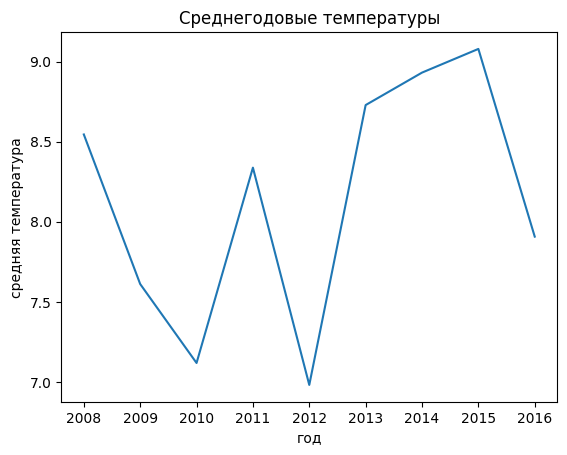

In [10]:
# ваш код

# из первого задания:
# means_by_year = df.groupby(df.Day.dt.year)['t'].mean().reset_index().rename(columns={'Day':'Year'}) 
plt.plot(means_by_year['Year'], means_by_year['t'])
plt.xlabel('год')
plt.ylabel('средняя температура')
plt.title('Среднегодовые температуры')